In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"], index_col ="Date")
df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"])
print(df.columns)
print("\n------------\n")
print(df.info())
print("\n------------\n")
print(df.iloc[0])

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed'],
      dtype='object')

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  datetime64[ns]
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-null  float64  

In [61]:
# df.groupby(pd.Grouper(key='Date', freq='2YE')).sum()
# df.plot(kind = 'scatter', x = 'Date', y = 'Persons Killed')
# plt.show()
# df["Date"] = pd.to_datetime(df["Date"])
# df["Date"].head
# df2 = df.groupby(pd.Grouper(key='Date', freq='YE'))
# df.plot(x = 'Date', y = 'Persons Killed', figsize=(20, 10))
# plt.title('Scatter Plot')
# plt.show()
# df2 = killed_date.groupby(pd.Grouper(key='Date', freq='ME'))
# df2 = df.groupby([df.index.year])["Persons Killed"].sum()
# print(df.shape)
# df2 = df[["Date", "Persons Killed"]]
# print(df2.shape)
# df3 = df["Date"]
# print(df3.shape)
# df2.info()
# df.Date.info()

# print(persons_killed.shape)
# print(persons_killed)
# persons_killed.info()
borough = df.groupby(df["Borough"])["Borough"]
borough.describe()

,count,unique,top,freq
Borough,,,,
Bronx,41255,1,Bronx,41255
Brooklyn,76416,1,Brooklyn,76416
Manhattan,38234,1,Manhattan,38234
Queens,63751,1,Queens,63751
Staten Island,11568,1,Staten Island,11568


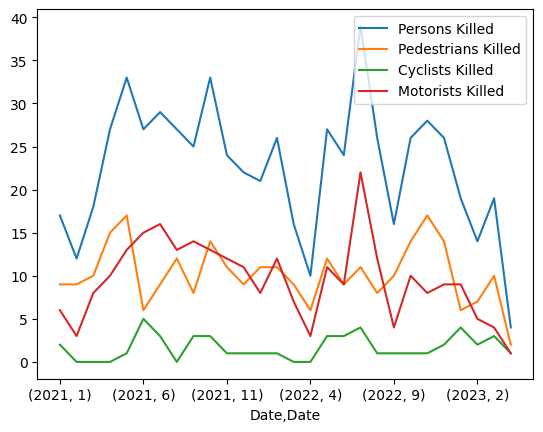

In [62]:
persons_killed = df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

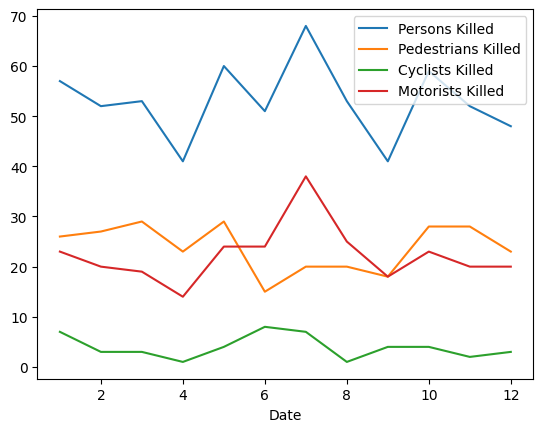

In [43]:
persons_killed = df.groupby([df["Date"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["Date"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["Date"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["Date"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

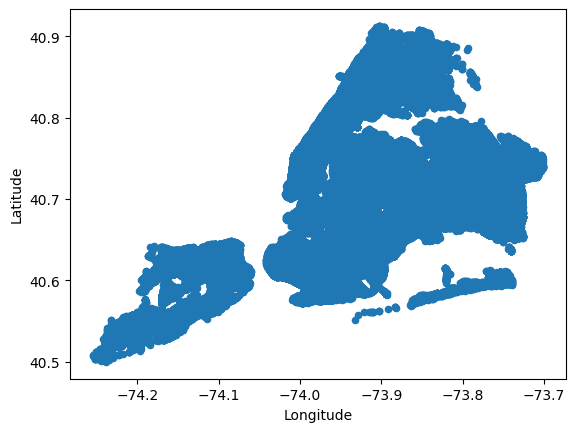

In [6]:
lat_long_killed = df[["Latitude", "Longitude"]]
lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
plt.show()

In [11]:
print(lat_long_killed["Latitude"].min())
print(lat_long_killed["Latitude"].max())
print(lat_long_killed["Longitude"].min())
print(lat_long_killed["Longitude"].max())

40.49971
40.912884
-74.25496
-73.70061


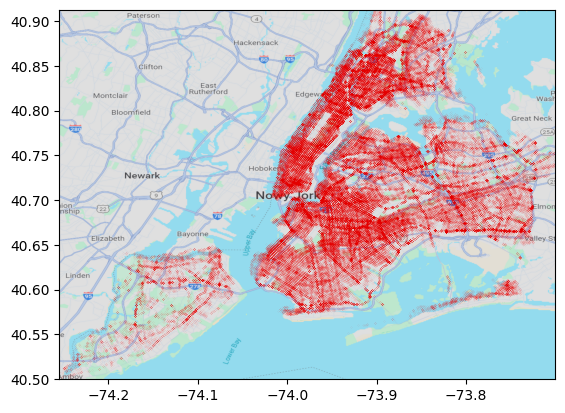

In [47]:
img = plt.imread("map.png")
fig, ax = plt.subplots()
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
#lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
ax.scatter(lat_long_killed["Longitude"], lat_long_killed["Latitude"], color='red', s=0.0005)
plt.show()